# 📌 COCO 평가 지표 (mAP) 상세 설명

COCO 데이터셋에서 모델 성능을 평가할 때 **Mean Average Precision (mAP)** 지표를 사용합니다.  

---

## **✅ 1. `mAP`란?**
### **Mean Average Precision (mAP)**
- **객체 탐지(Object Detection)**와 **인스턴스 분할(Instance Segmentation)** 성능을 평가하는 대표적인 지표입니다.
- Precision-Recall 곡선의 **면적(AUC, Area Under Curve)**을 계산해서 평균값을 구합니다.

---

## **✅ 2. `bbox_mAP` vs `segm_mAP`**
| 지표 | 의미 |
|------|------|
| **`bbox_mAP`** | **Bounding Box AP (객체 탐지 성능 평가)** |
| **`segm_mAP`** | **Segmentation AP (객체 분할 성능 평가)** |

- **`bbox_mAP` (Bounding Box AP)**  
  → `bounding box`(경계 상자) 기준으로 얼마나 정확한지 측정  

- **`segm_mAP` (Segmentation AP)**  
  → `mask`(픽셀 단위 영역) 기준으로 얼마나 정확한지 측정  

💡 **즉, `bbox_mAP`는 박스 예측 정확도, `segm_mAP`는 마스크 예측 정확도를 나타냅니다.**

---

## **✅ 3. `IoU (Intersection over Union)`란?**
📌 **IoU (Intersection over Union)**란 **예측된 박스(또는 마스크)와 실제 GT(Ground Truth) 간의 겹치는 비율**입니다.  

$$
IoU = \frac{ \text{예측 영역} \cap \text{GT 영역} }{ \text{예측 영역} \cup \text{GT 영역} }
$$


- **IoU 값이 클수록 예측이 더 정확한 것**
- COCO 평가에서는 다양한 IoU 값에서 AP를 계산합니다.

---

## **✅ 4. `mAP` 지표별 의미**
| 지표 | 의미 |
|------|------|
| **`bbox_mAP`** | **IoU 0.50~0.95 범위에서 mAP (0.05 간격 평균)** (객체 탐지) |
| **`bbox_mAP_50`** | **IoU = 0.50 (PASCAL VOC 기준 AP)** |
| **`bbox_mAP_75`** | **IoU = 0.75 (더 엄격한 기준)** |
| **`segm_mAP`** | **IoU 0.50~0.95 범위에서 mAP (0.05 간격 평균)** (객체 분할) |
| **`segm_mAP_50`** | **IoU = 0.50에서 segmentation AP** |
| **`segm_mAP_75`** | **IoU = 0.75에서 segmentation AP** |

💡 **즉, `bbox_mAP_50`과 `segm_mAP_50`은 IoU 50%에서 평가, `bbox_mAP_75`는 75%에서 평가하는 값 입니다**

---


### 1. 작업 디렉토리로 이동

In [1]:
cd mmdetection

D:\plantdetection\mmdetection


C:\Users\itcon\anaconda3\envs\mmdet\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### 2. pkl 파일 불러오기

In [5]:
import pickle

# 저장된 pkl 파일 불러오기
pkl_path_80 = "evaluation_results/results_80.pkl"
# pkl_path_200 = "result/result/results_200.pkl"
# pkl_path_100 = "result/result/results_100.pkl"

# 에포크 수에 맞게 이름 변경
with open(pkl_path_80, "rb") as f:
    results_80 = pickle.load(f)

# with open(pkl_path_200, "rb") as f:
#     results_200 = pickle.load(f)    

# with open(pkl_path_100, "rb") as f:
#     results_100 = pickle.load(f)


In [5]:
import pickle

# 저장된 pkl 파일 불러오기
tomato_results = "evaluation_results/results.pkl"

# 에포크 수에 맞게 이름 변경
with open(onion_results, "rb") as f:
    onion_results = pickle.load(f)


### 3. 평가 실행

In [11]:
%matplotlib inline
import pickle
from mmdet.evaluation.metrics import CocoMetric

# 🔹 테스트 데이터셋의 GT 파일 (json) 경로
ann_file = "data/tes/dataset.json"

# 🔹 COCO 평가 메트릭 객체 생성
coco_metric = CocoMetric(
    ann_file=ann_file,
    metric=['bbox', 'segm'],  # bbox (박스) & segm (마스크) 평가
    classwise=False  # 클래스별 AP도 보고 싶다면 True
)

# 🔹 에포크 별 평가 실행
coco_metric.dataset_meta = dict(classes = ["fruit", "cap", "petiole", "stem", "midrib", "leaf", "flower"] )  # 클래스 이름 설정
coco_metric.process({}, results_100)
map_results_100 = coco_metric.evaluate(size=len(results_100))

coco_metric.dataset_meta = dict(classes = ["fruit", "cap", "petiole", "stem", "midrib", "leaf", "flower"] )  # 클래스 이름 설정
coco_metric.process({}, results_200)
map_results_200 = coco_metric.evaluate(size=len(results_200))

coco_metric.dataset_meta = dict(classes = ["fruit", "cap", "petiole", "stem", "midrib", "leaf", "flower"] )  # 클래스 이름 설정
coco_metric.process({}, results_390)
map_results_390 = coco_metric.evaluate(size=len(results_390))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
03/14 14:18:47 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.418
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.429
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.429
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.323
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.423
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.423
 Avera

In [9]:

%matplotlib inline
import pickle
from mmdet.evaluation.metrics import CocoMetric

# 🔹 테스트 데이터셋의 GT 파일 (json) 경로
ann_file = "data/onion_test/dataset.json"

# 🔹 COCO 평가 메트릭 객체 생성
coco_metric = CocoMetric(
    ann_file=ann_file,
    metric=['bbox', 'segm'],  # bbox (박스) & segm (마스크) 평가
    classwise=False  # 클래스별 AP도 보고 싶다면 True
)

# 🔹 에포크 별 평가 실행
coco_metric.dataset_meta = dict(classes = ["leaf", "stem", "top_fruit", "fruit"] )  # 클래스 이름 설정
coco_metric.process({}, onion_results)
map_onion_results = coco_metric.evaluate(size=len(onion_results))


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
03/20 09:57:21 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.988
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.988
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.950
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.987
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.985
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.985
 Aver

### 4. 평가 결과 텍스트로 출력

In [13]:
# 🔹 결과 출력
print("epoch : 100")
for key, value in map_results_100.items():
    print(f"{key}: {value:.4f}")

print("epoch : 200")
for key, value in map_results_200.items():
    print(f"{key}: {value:.4f}")

print("epoch : 390")
for key, value in map_results_390.items():
    print(f"{key}: {value:.4f}")


epoch : 100
coco/bbox_mAP: 0.4180
coco/bbox_mAP_50: 0.4290
coco/bbox_mAP_75: 0.4290
coco/bbox_mAP_s: 0.0000
coco/bbox_mAP_m: 0.3230
coco/bbox_mAP_l: 0.4210
coco/segm_mAP: 0.3910
coco/segm_mAP_50: 0.4290
coco/segm_mAP_75: 0.4290
coco/segm_mAP_s: 0.0000
coco/segm_mAP_m: 0.2870
coco/segm_mAP_l: 0.4010
epoch : 200
coco/bbox_mAP: 0.4280
coco/bbox_mAP_50: 0.4290
coco/bbox_mAP_75: 0.4290
coco/bbox_mAP_s: 0.0000
coco/bbox_mAP_m: 0.3330
coco/bbox_mAP_l: 0.4280
coco/segm_mAP: 0.4000
coco/segm_mAP_50: 0.4290
coco/segm_mAP_75: 0.4290
coco/segm_mAP_s: 0.0000
coco/segm_mAP_m: 0.2970
coco/segm_mAP_l: 0.4080
epoch : 390
coco/bbox_mAP: 0.4270
coco/bbox_mAP_50: 0.4290
coco/bbox_mAP_75: 0.4290
coco/bbox_mAP_s: 0.0000
coco/bbox_mAP_m: 0.3330
coco/bbox_mAP_l: 0.4270
coco/segm_mAP: 0.4030
coco/segm_mAP_50: 0.4290
coco/segm_mAP_75: 0.4290
coco/segm_mAP_s: 0.0000
coco/segm_mAP_m: 0.3010
coco/segm_mAP_l: 0.4110


In [11]:
# 🔹 결과 출력
print("onion_results")
for key, value in map_onion_results.items():
    print(f"{key}: {value:.4f}")

onion_results
coco/bbox_mAP: 0.9830
coco/bbox_mAP_50: 0.9880
coco/bbox_mAP_75: 0.9880
coco/bbox_mAP_s: -1.0000
coco/bbox_mAP_m: 0.9500
coco/bbox_mAP_l: 0.9870
coco/segm_mAP: 0.8480
coco/segm_mAP_50: 0.9780
coco/segm_mAP_75: 0.9450
coco/segm_mAP_s: -1.0000
coco/segm_mAP_m: 0.8000
coco/segm_mAP_l: 0.8540


### 5. 성능 비교를 위한 파일 변환

In [15]:
# 결과를 딕셔너리 형태로 저장
map_results_100 = {key: round(value, 4) for key, value in map_results_100.items()}

map_results_200 = {key: round(value, 4) for key, value in map_results_200.items()}

map_results_390 = {key: round(value, 4) for key, value in map_results_390.items()}

In [13]:
# 결과를 딕셔너리 형태로 저장
map_onion_results = {key: round(value, 4) for key, value in map_onion_results.items()}

In [17]:
# 🔹 최종 결과 출력
print(map_results_100)

print(map_results_200)

print(map_results_390)

{'coco/bbox_mAP': 0.418, 'coco/bbox_mAP_50': 0.429, 'coco/bbox_mAP_75': 0.429, 'coco/bbox_mAP_s': 0.0, 'coco/bbox_mAP_m': 0.323, 'coco/bbox_mAP_l': 0.421, 'coco/segm_mAP': 0.391, 'coco/segm_mAP_50': 0.429, 'coco/segm_mAP_75': 0.429, 'coco/segm_mAP_s': 0.0, 'coco/segm_mAP_m': 0.287, 'coco/segm_mAP_l': 0.401}
{'coco/bbox_mAP': 0.428, 'coco/bbox_mAP_50': 0.429, 'coco/bbox_mAP_75': 0.429, 'coco/bbox_mAP_s': 0.0, 'coco/bbox_mAP_m': 0.333, 'coco/bbox_mAP_l': 0.428, 'coco/segm_mAP': 0.4, 'coco/segm_mAP_50': 0.429, 'coco/segm_mAP_75': 0.429, 'coco/segm_mAP_s': 0.0, 'coco/segm_mAP_m': 0.297, 'coco/segm_mAP_l': 0.408}
{'coco/bbox_mAP': 0.427, 'coco/bbox_mAP_50': 0.429, 'coco/bbox_mAP_75': 0.429, 'coco/bbox_mAP_s': 0.0, 'coco/bbox_mAP_m': 0.333, 'coco/bbox_mAP_l': 0.427, 'coco/segm_mAP': 0.403, 'coco/segm_mAP_50': 0.429, 'coco/segm_mAP_75': 0.429, 'coco/segm_mAP_s': 0.0, 'coco/segm_mAP_m': 0.301, 'coco/segm_mAP_l': 0.411}


In [15]:
# 🔹 최종 결과 출력
print(map_onion_results)

{'coco/bbox_mAP': 0.983, 'coco/bbox_mAP_50': 0.988, 'coco/bbox_mAP_75': 0.988, 'coco/bbox_mAP_s': -1.0, 'coco/bbox_mAP_m': 0.95, 'coco/bbox_mAP_l': 0.987, 'coco/segm_mAP': 0.848, 'coco/segm_mAP_50': 0.978, 'coco/segm_mAP_75': 0.945, 'coco/segm_mAP_s': -1.0, 'coco/segm_mAP_m': 0.8, 'coco/segm_mAP_l': 0.854}


### 6. 지표 시각화를 위한 그래프 그리기

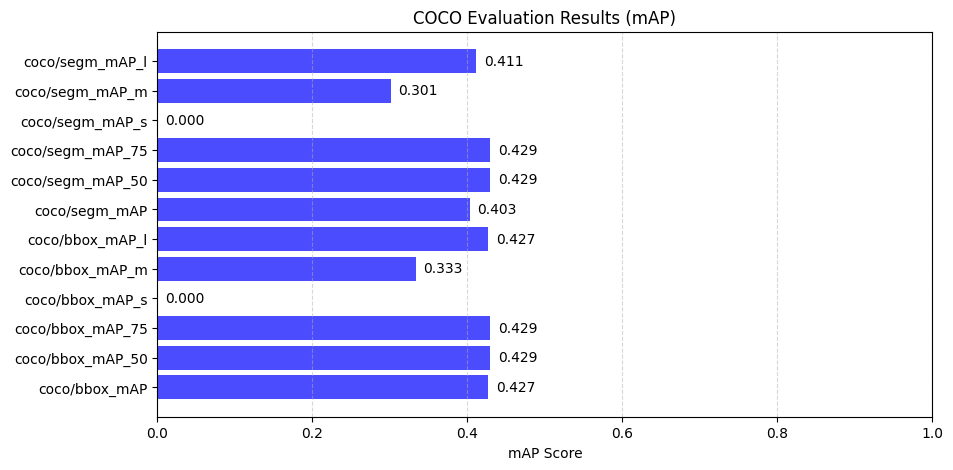

In [21]:
import matplotlib.pyplot as plt

# 데이터 분리 (파일명 상황에 맞게 변경)
metrics = list(map_results_390.keys())
values = list(map_results_390.values())

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.barh(metrics, values, color='blue', alpha=0.7)
plt.xlabel("mAP Score")
plt.title("COCO Evaluation Results (mAP)")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 값 표시
for i, v in enumerate(values):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center', fontsize=10)

# 출력
plt.show()


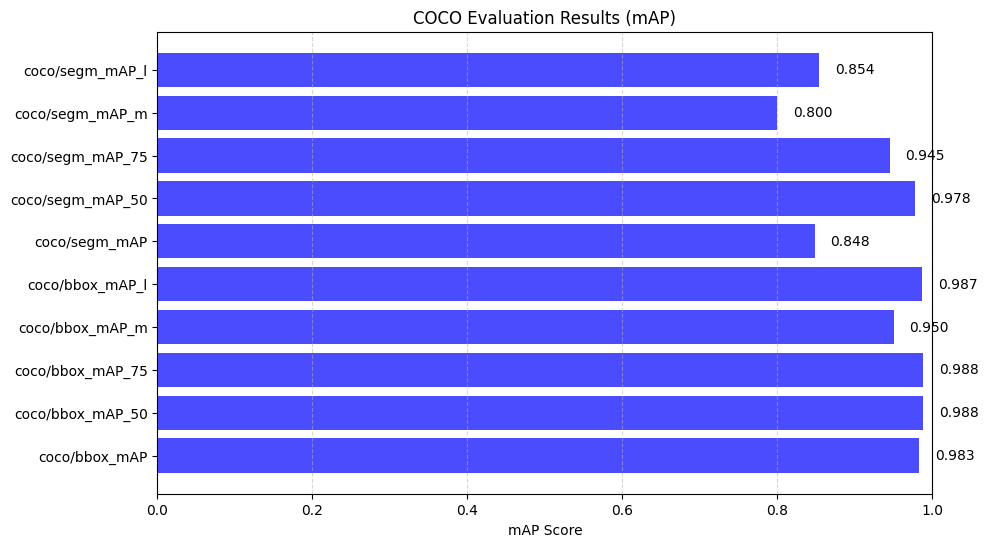

In [21]:
import matplotlib.pyplot as plt

# 음수 값 제거
filtered_metrics = []
filtered_values = []

for metric, value in zip(map_onion_results.keys(), map_onion_results.values()):
    if value >= 0:  # -1.000 같은 값 제거
        filtered_metrics.append(metric)
        filtered_values.append(value)

# 그래프 크기 조절
plt.figure(figsize=(10, 6))

# 가로 막대 그래프 그리기
plt.barh(filtered_metrics, filtered_values, color='blue', alpha=0.7)

# 제목 및 축 설정
plt.xlabel("mAP Score")
plt.title("COCO Evaluation Results (mAP)")
plt.xlim(0, 1)  # x축 범위 고정
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 값 표시 (막대 끝 부분에 값 배치)
for i, v in enumerate(filtered_values):
    plt.text(v + 0.02, i, f"{v:.3f}", va='center', fontsize=10)

plt.show()


### 7. 데이터프레임으로 변환

In [52]:
import pandas as pd

# mAP 결과를 DataFrame으로 변환
df_results_100 = pd.DataFrame(list(map_results_100.items()), columns=['Metric', 'Value'])

In [23]:
import pandas as pd

# mAP 결과를 DataFrame으로 변환
df_onion_results = pd.DataFrame(list(map_onion_results.items()), columns=['Metric', 'Value'])

ModuleNotFoundError: No module named 'pandas'

In [53]:
df_results_100

,Metric,Value
0,coco/bbox_mAP,0.418
1,coco/bbox_mAP_50,0.429
2,coco/bbox_mAP_75,0.429
3,coco/bbox_mAP_s,0.000
4,coco/bbox_mAP_m,0.323
5,coco/bbox_mAP_l,0.421
6,coco/segm_mAP,0.391
7,coco/segm_mAP_50,0.429
8,coco/segm_mAP_75,0.429
9,coco/segm_mAP_s,0.000


### 8. 결과 시각화를 위한 히트맵 그리기

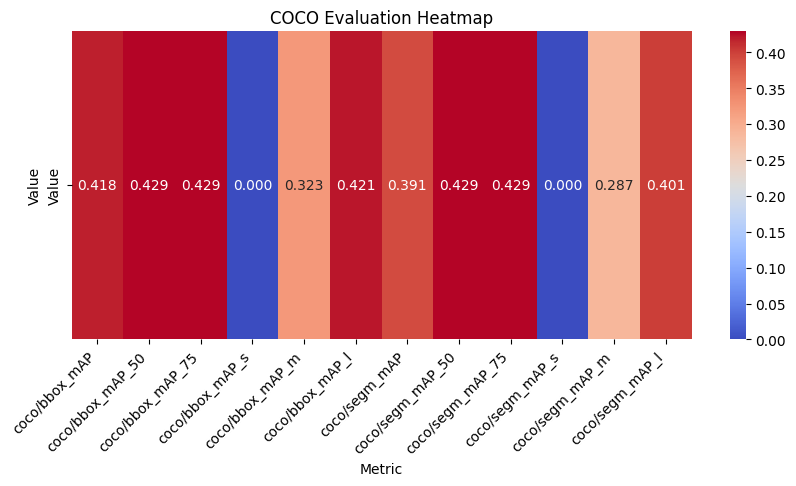

In [54]:
# 라이브러리 다시 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_results_100 = pd.DataFrame(map_results.items(), columns=['Metric', 'Value'])

# 히트맵 그리기 (글씨가 안 겹치도록 회전)
plt.figure(figsize=(10, 4))
ax = sns.heatmap(df_results.set_index('Metric').T, annot=True, cmap="coolwarm", cbar=True, fmt=".3f")

# x축 글씨 회전 조정
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("COCO Evaluation Heatmap")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.show()


### 9. 결과 시각화를 위한 그래프 그리기
- 기준 이하 수치는 빨강색으로 표현
- 기준 이상 수치는 파랑색으로 표현

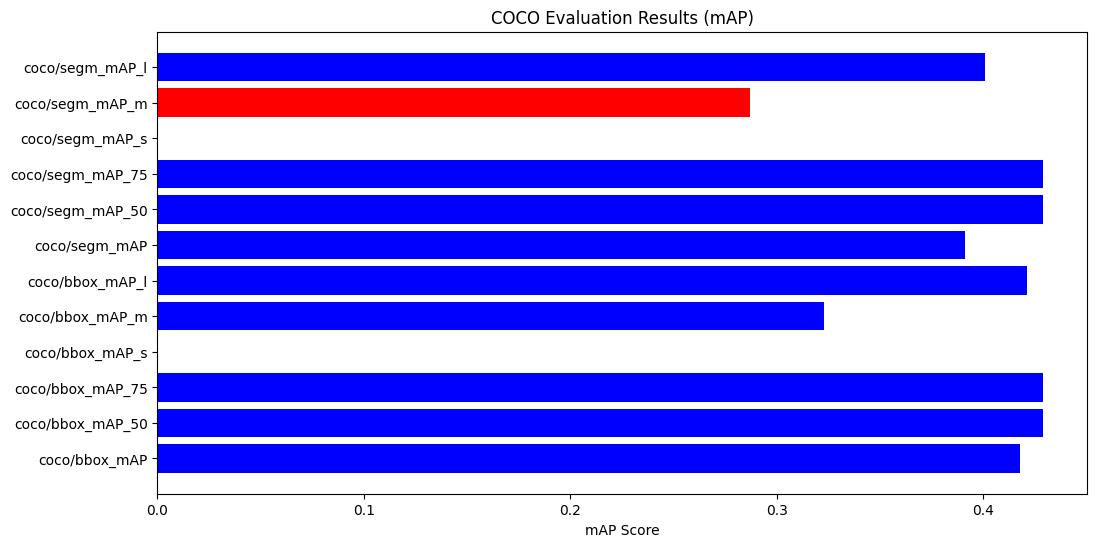

In [55]:
plt.figure(figsize=(12, 6))
plt.barh(df_results["Metric"], df_results["Value"], color=['red' if v < 0.3 else 'blue' for v in df_results["Value"]])
plt.xlabel("mAP Score")
plt.title("COCO Evaluation Results (mAP)")
plt.show()


### 10. 모델간 성능 비교

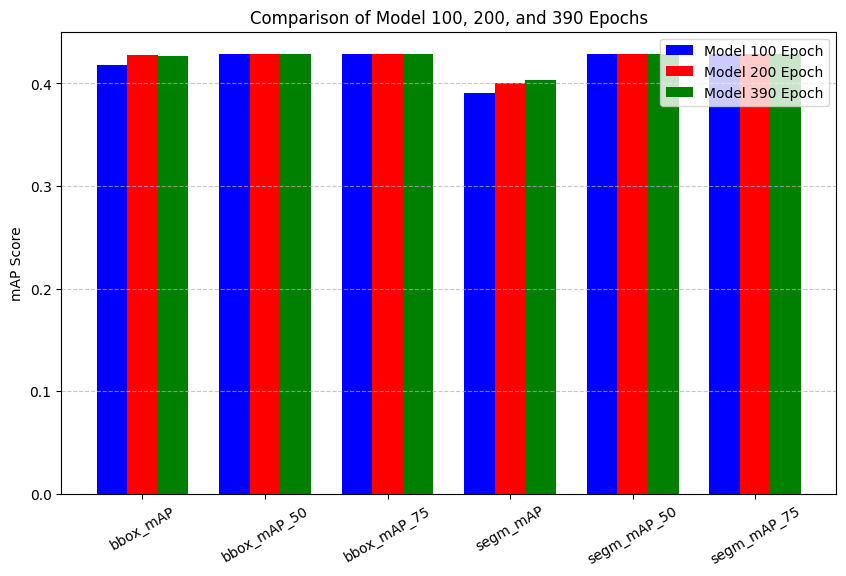

In [59]:
import matplotlib.pyplot as plt
import numpy as np

metrics = [
    "coco/bbox_mAP", "coco/bbox_mAP_50", "coco/bbox_mAP_75",
    "coco/segm_mAP", "coco/segm_mAP_50", "coco/segm_mAP_75"
]

# 🔹 각 모델의 성능 리스트
model1_scores = [map_results_100.get(m, 0.0) for m in metrics]  # 100 Epoch
model2_scores = [map_results_200.get(m, 0.0) for m in metrics]  # 200 Epoch
model3_scores = [map_results_390.get(m, 0.0) for m in metrics]  # 390 Epoch

x = np.arange(len(metrics))  # X축 인덱스 설정

plt.figure(figsize=(10, 6))

# 🔹 각 모델의 막대 그래프 그리기 (간격 조정)
plt.bar(x - 0.25, model1_scores, width=0.25, label="Model 100 Epoch", color='b')
plt.bar(x, model2_scores, width=0.25, label="Model 200 Epoch", color='r')
plt.bar(x + 0.25, model3_scores, width=0.25, label="Model 390 Epoch", color='g')

# 🔹 그래프 설정
plt.xticks(x, ["bbox_mAP", "bbox_mAP_50", "bbox_mAP_75", "segm_mAP", "segm_mAP_50", "segm_mAP_75"], rotation=30)
plt.ylabel("mAP Score")
plt.title("Comparison of Model 100, 200, and 390 Epochs")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 🔹 그래프 출력
plt.show()
